##Checking for GPU and required modules

In [ ]:
!nvidia-smi
!pip install IPython
!pip install ultralytics
!pip install roboflow

Tue Nov  7 14:57:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##Importing Modules

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image
from roboflow import Roboflow

##Downloading Dataset using roboflow API

In [ ]:
rf = Roboflow(api_key="GI2mA1W83bq9TJgqLiyM")
project = rf.workspace("roboflow-universe-projects").project("construction-site-safety")
dataset = project.version(30).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.207, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Construction-Site-Safety-30 in yolov8:: 100%|██████████| 1446/1446 [00:00<00:00, 3980.75it/s]


##Training Nano Version of YOLOV8 with default optimizers with 200epoch

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/data.yaml epochs=200 imgsz=640

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=200, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fa

##Results of Nano Model

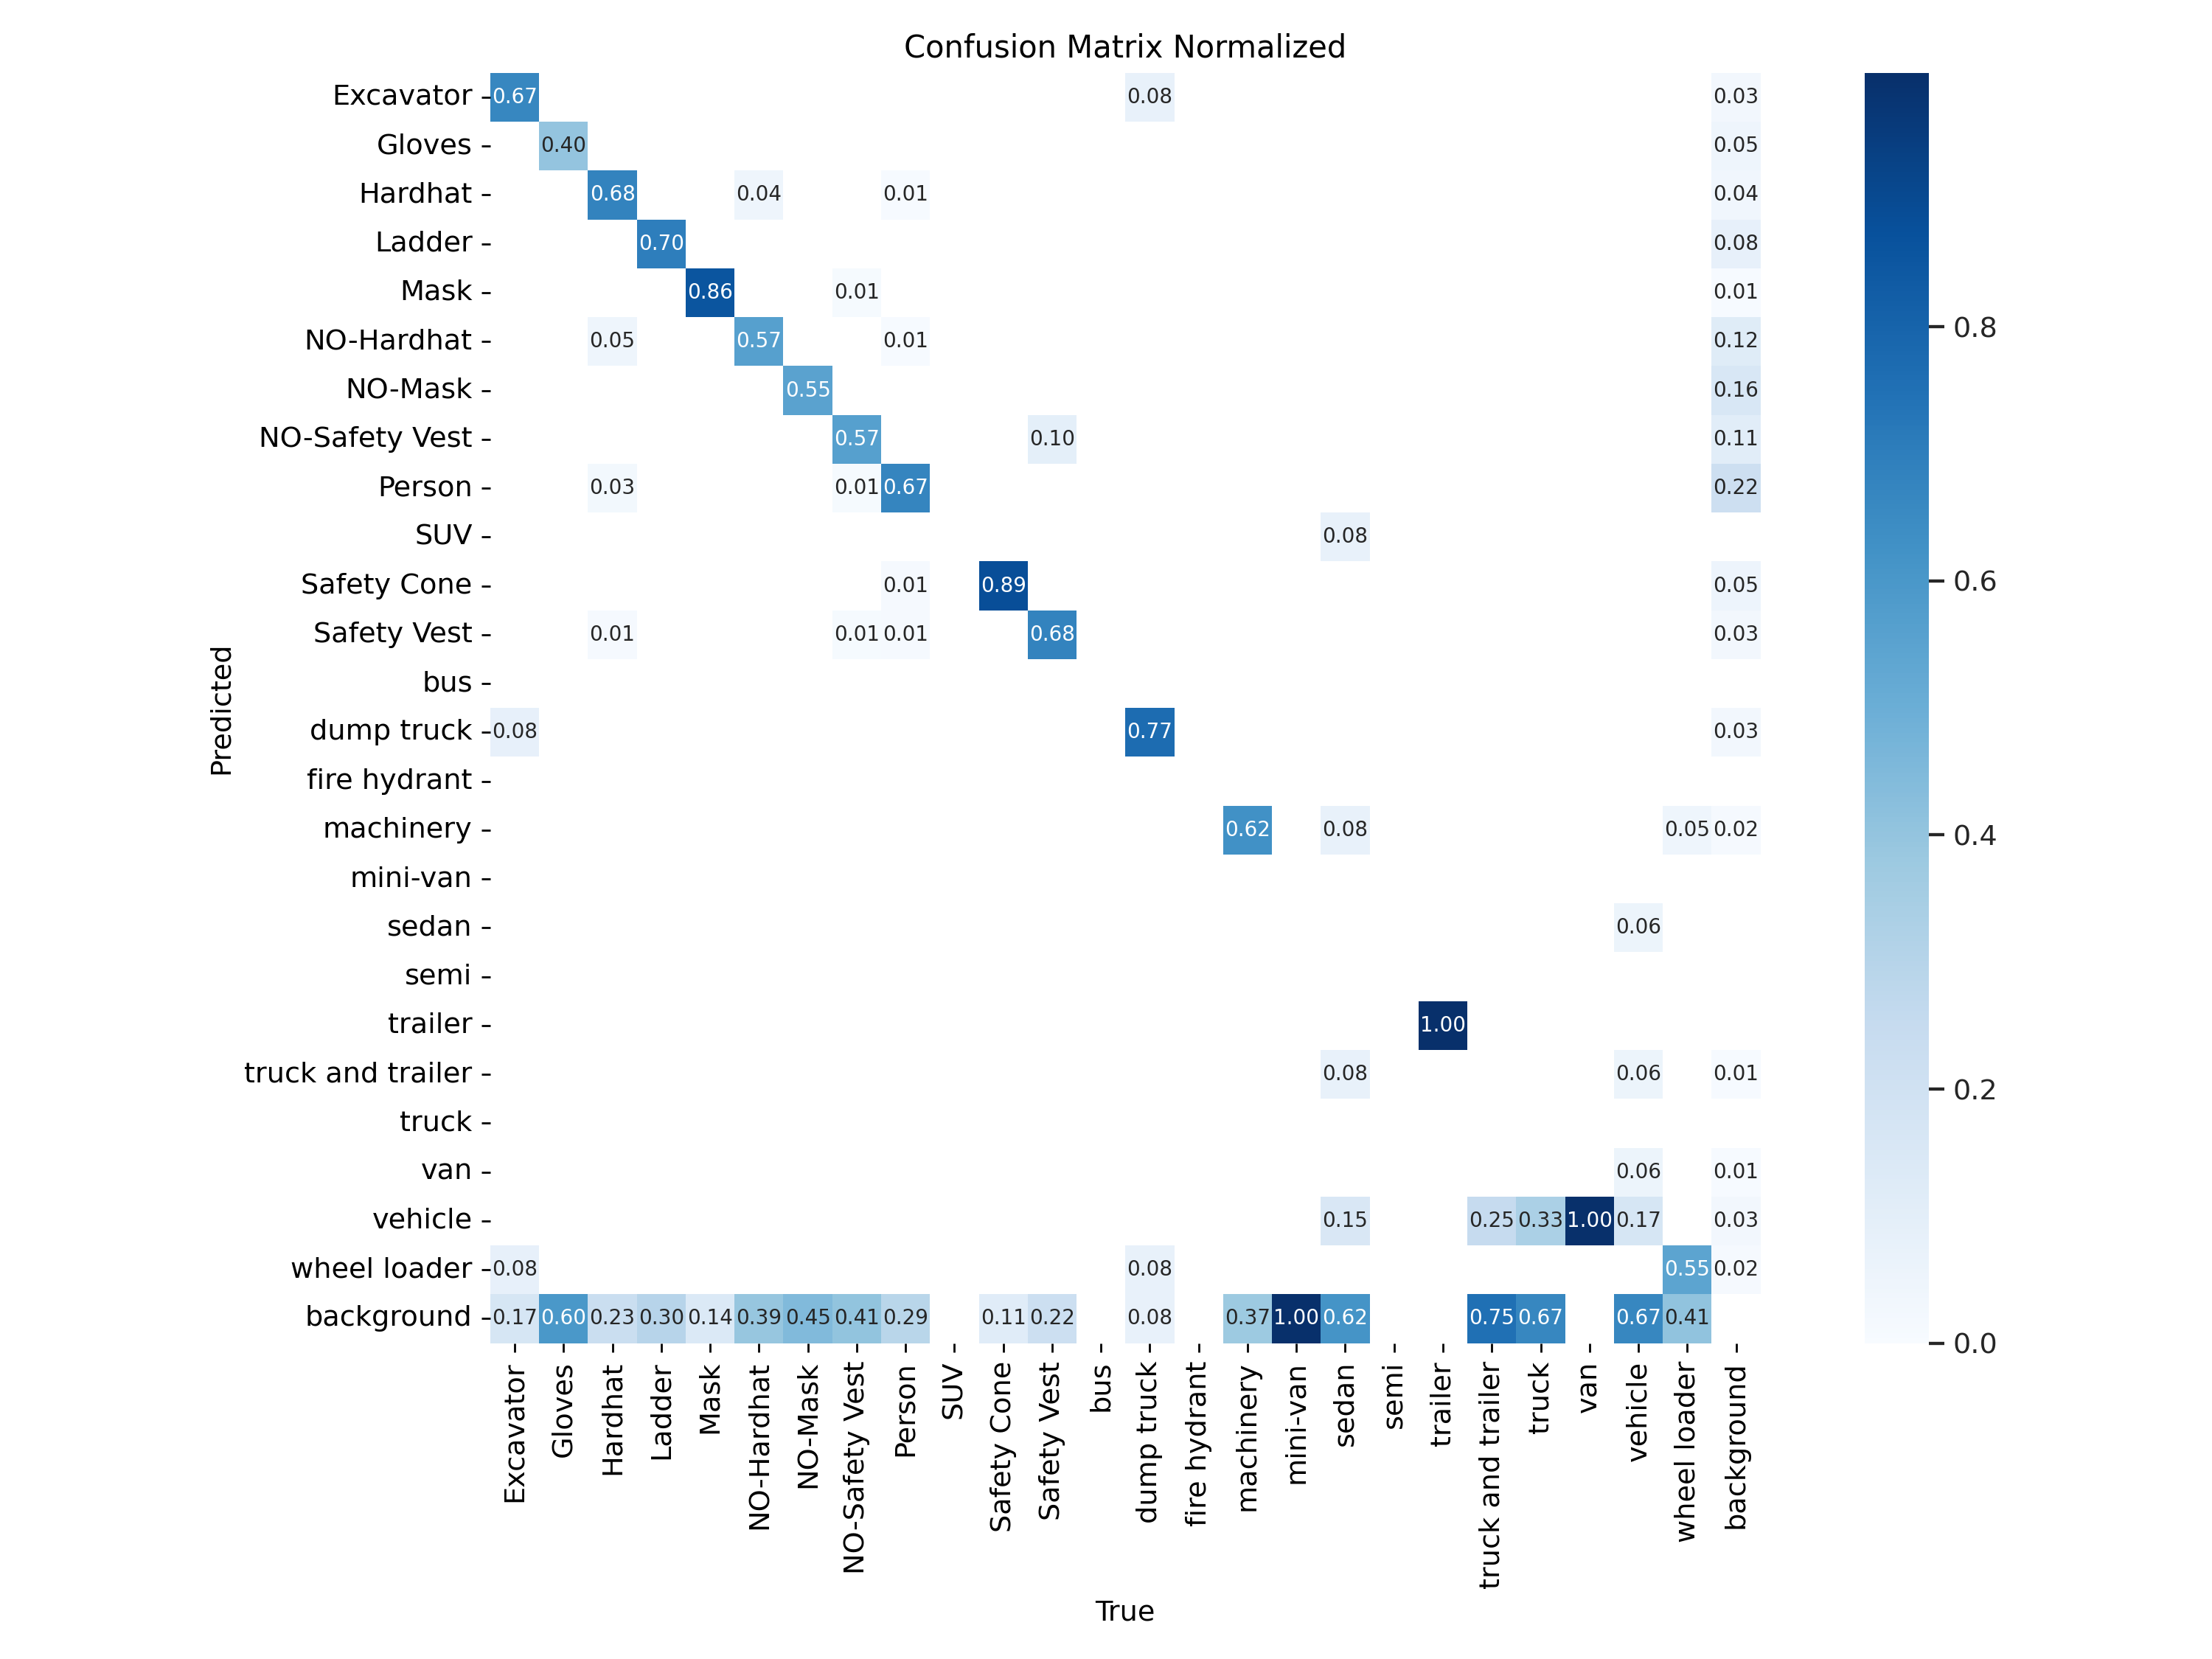

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix_normalized.png',width=600)

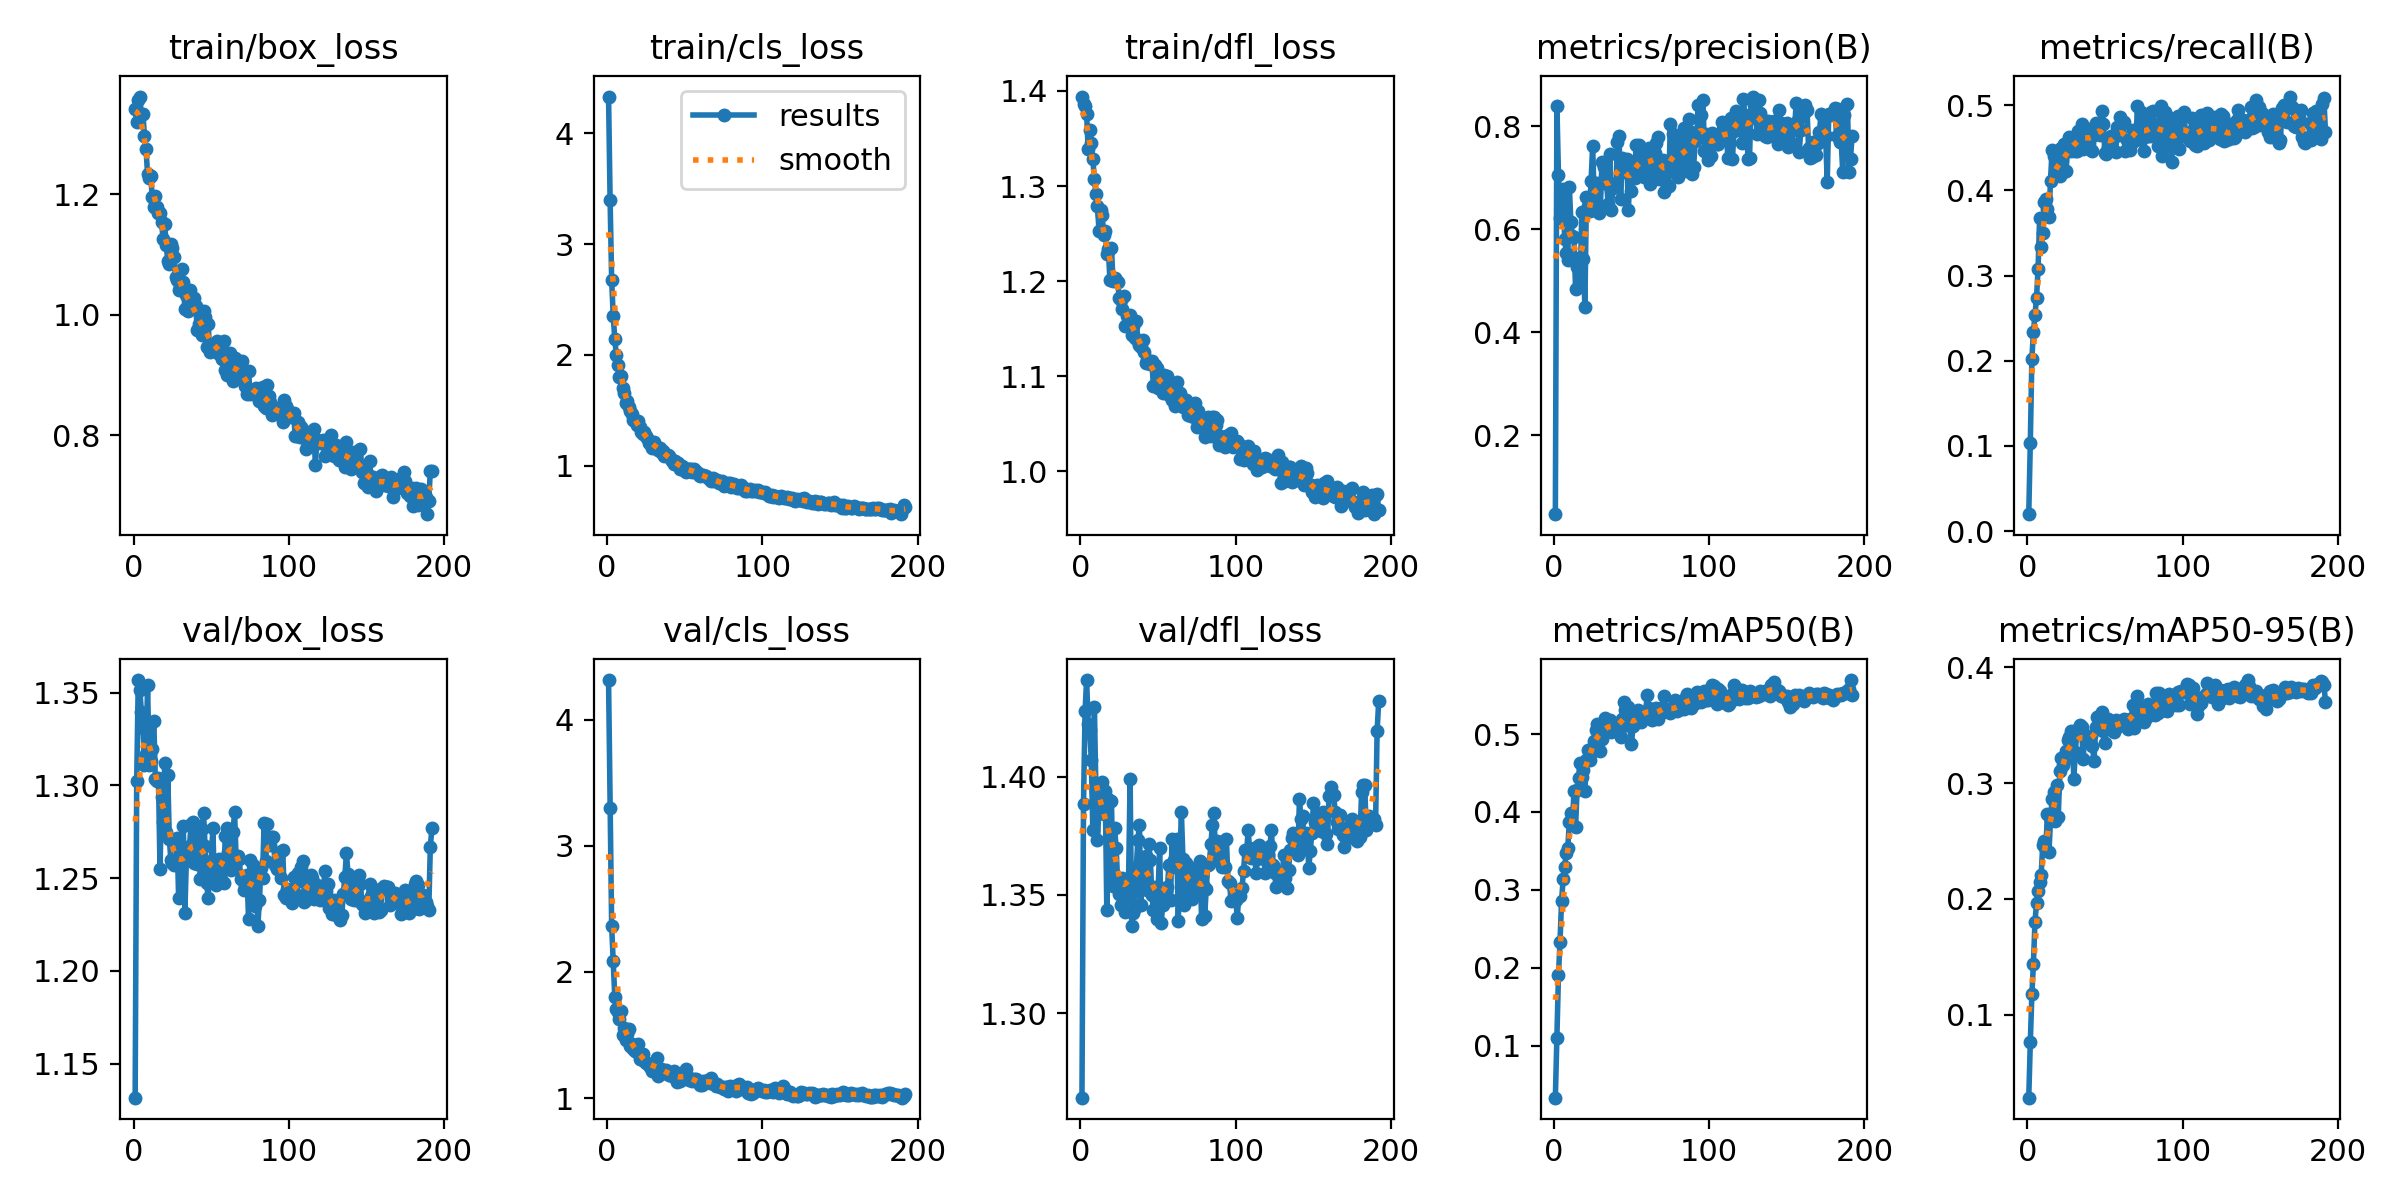

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png',width=600)

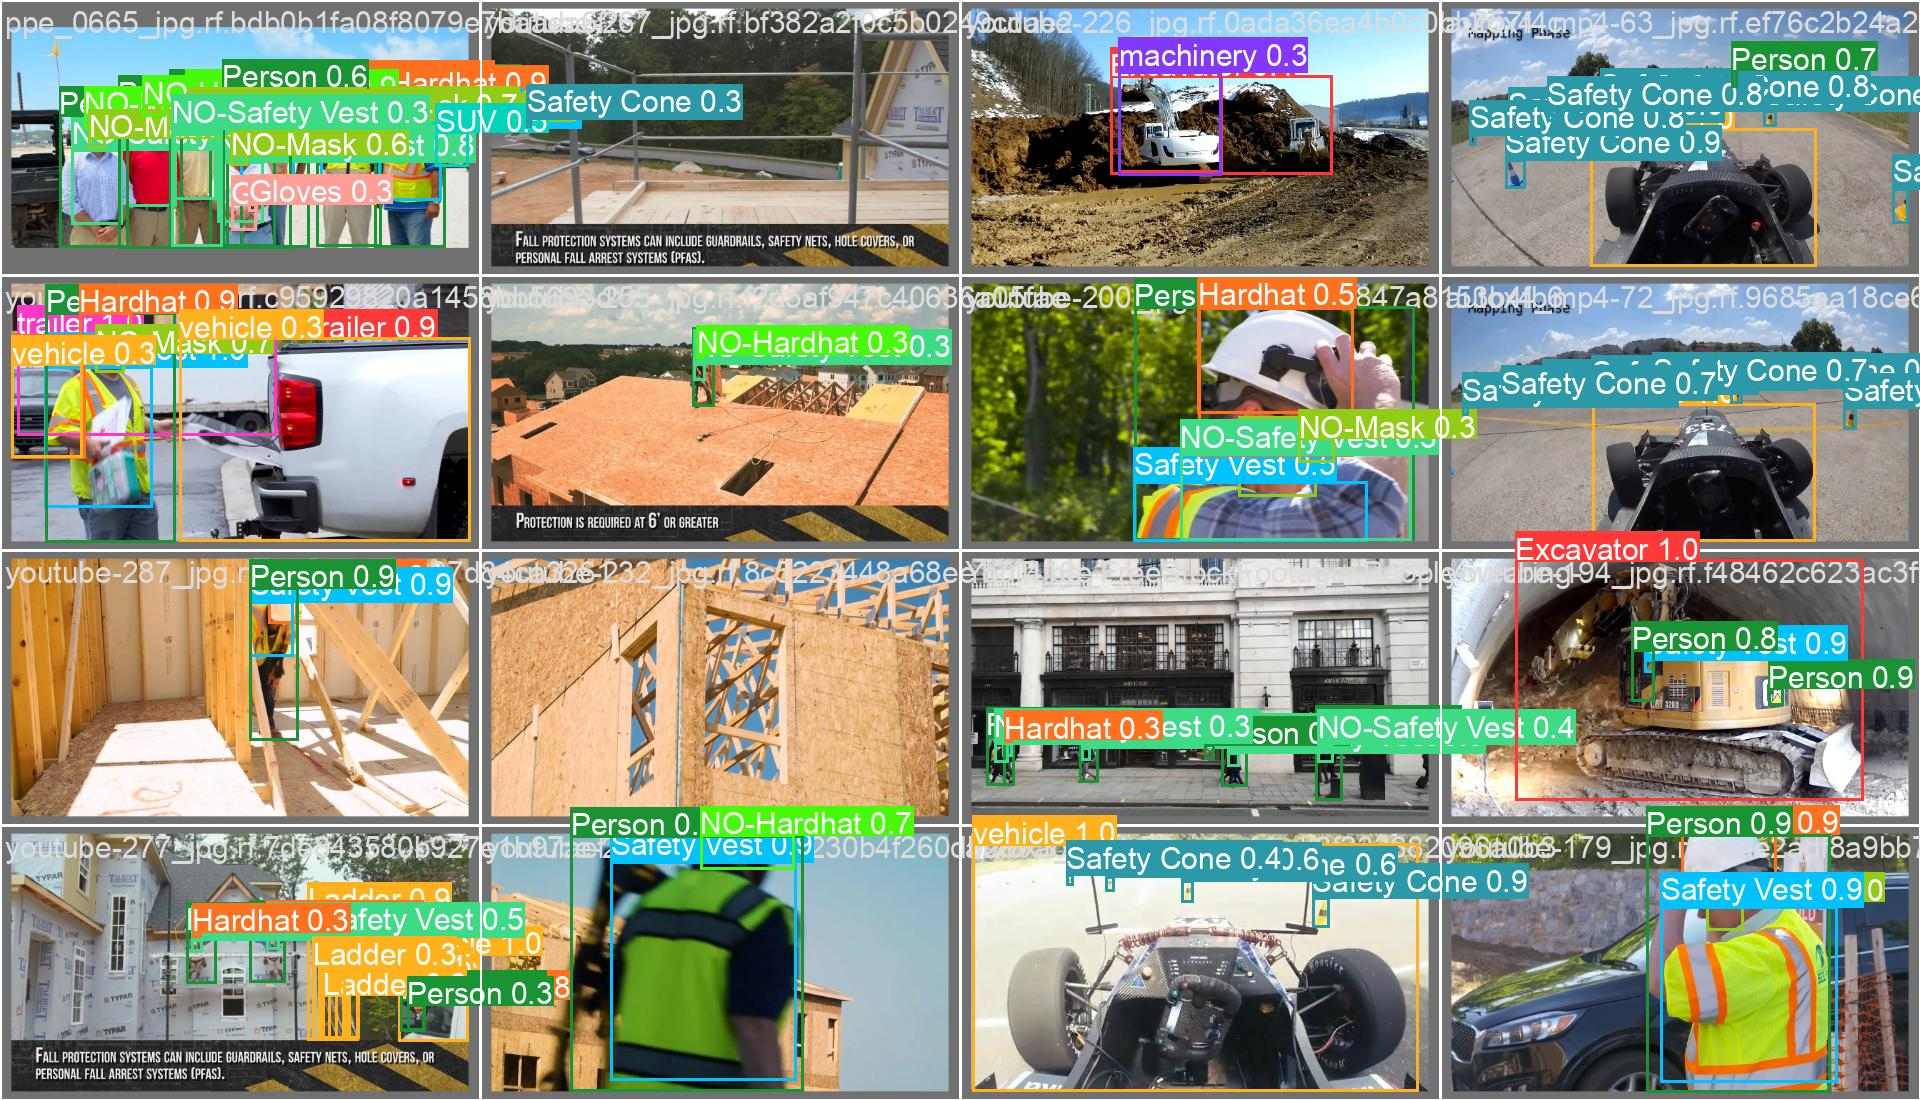

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg',width=1000)

##Downloading the model

In [ ]:
!zip -r /content/file.zip /content/runs
from google.colab import files
files.download("/content/file.zip")

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/results.csv (deflated 86%)
  adding: content/runs/detect/train/val_batch2_pred.jpg (deflated 8%)
  adding: content/runs/detect/train/train_batch1.jpg (deflated 4%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/best.pt (deflated 9%)
  adding: content/runs/detect/train/weights/last.pt (deflated 9%)
  adding: content/runs/detect/train/results.png (deflated 7%)
  adding: content/runs/detect/train/labels.jpg (deflated 21%)
  adding: content/runs/detect/train/args.yaml (deflated 51%)
  adding: content/runs/detect/train/val_batch1_labels.jpg (deflated 9%)
  adding: content/runs/detect/train/val_batch0_labels.jpg (deflated 5%)
  adding: content/runs/detect/train/train_batch6270.jpg (deflated 9%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 34%)
  adding: 

##Training Small Model of YOLOV8 with default optimizers with 200 epoch

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/data.yaml epochs=200 imgsz=640

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/data.yaml, epochs=200, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=F

##Results of Small Model

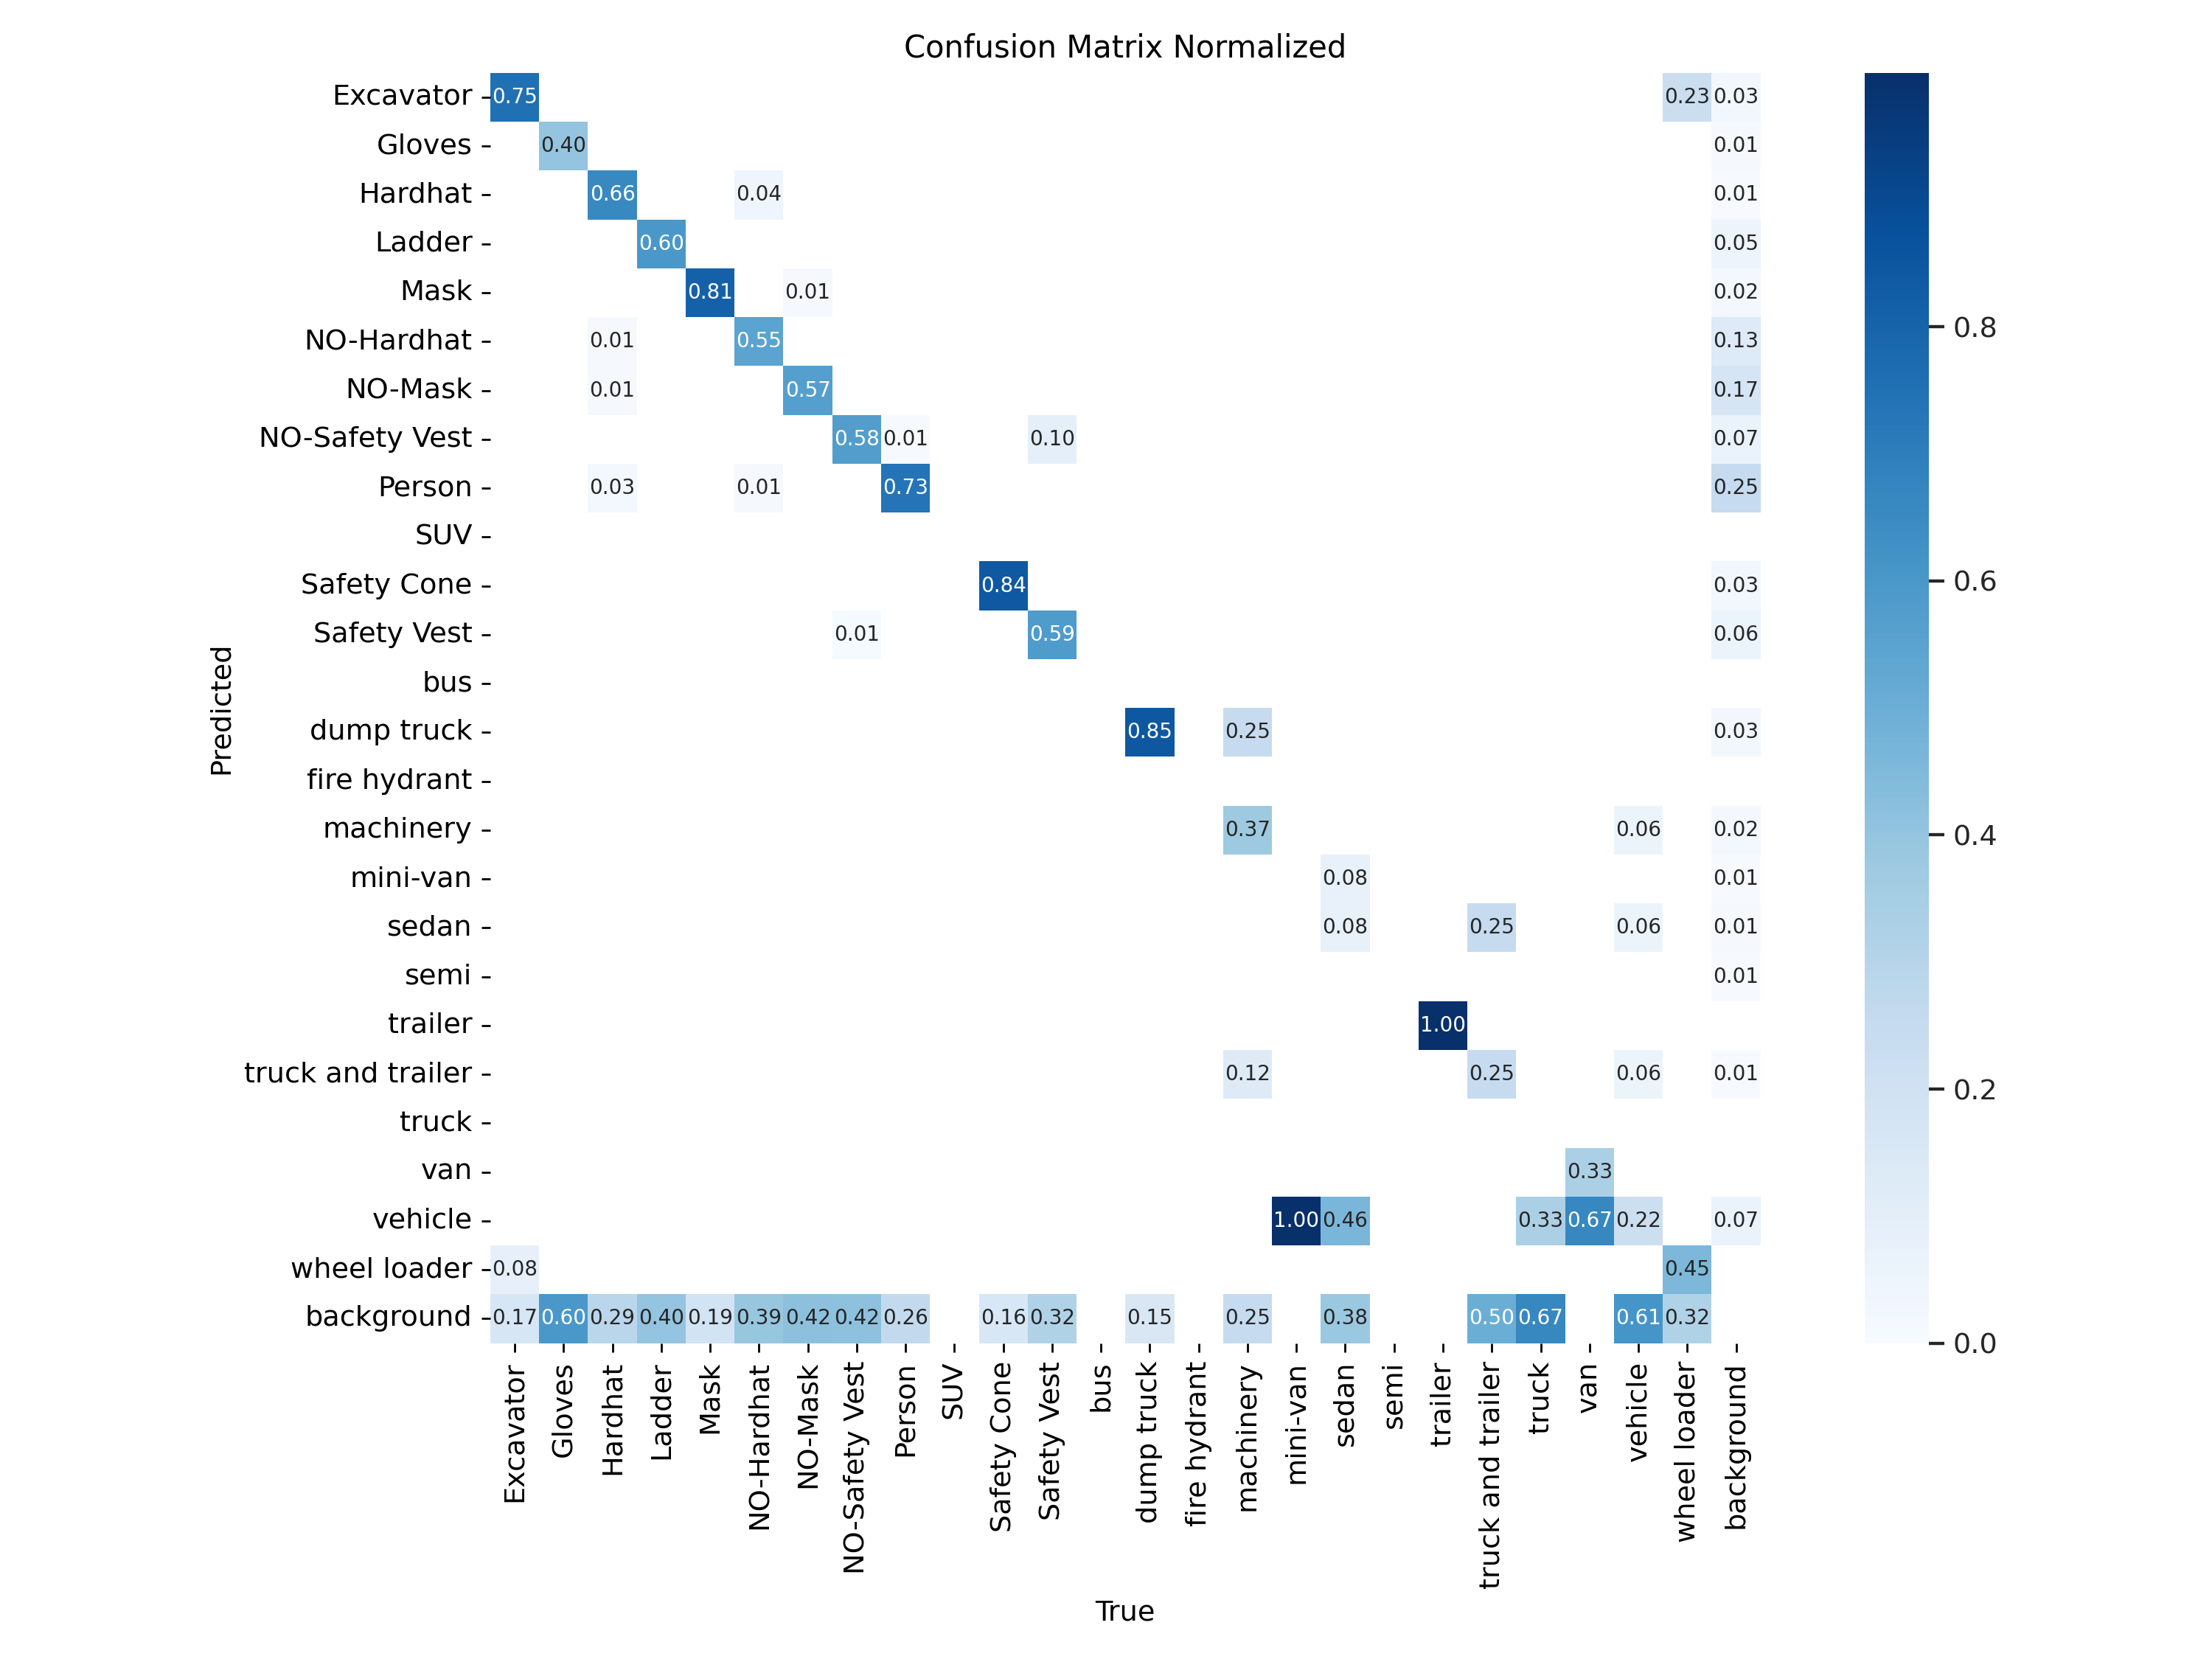

In [ ]:
Image(filename=f'/content/runs/detect/train2/confusion_matrix_normalized.png',width=600)

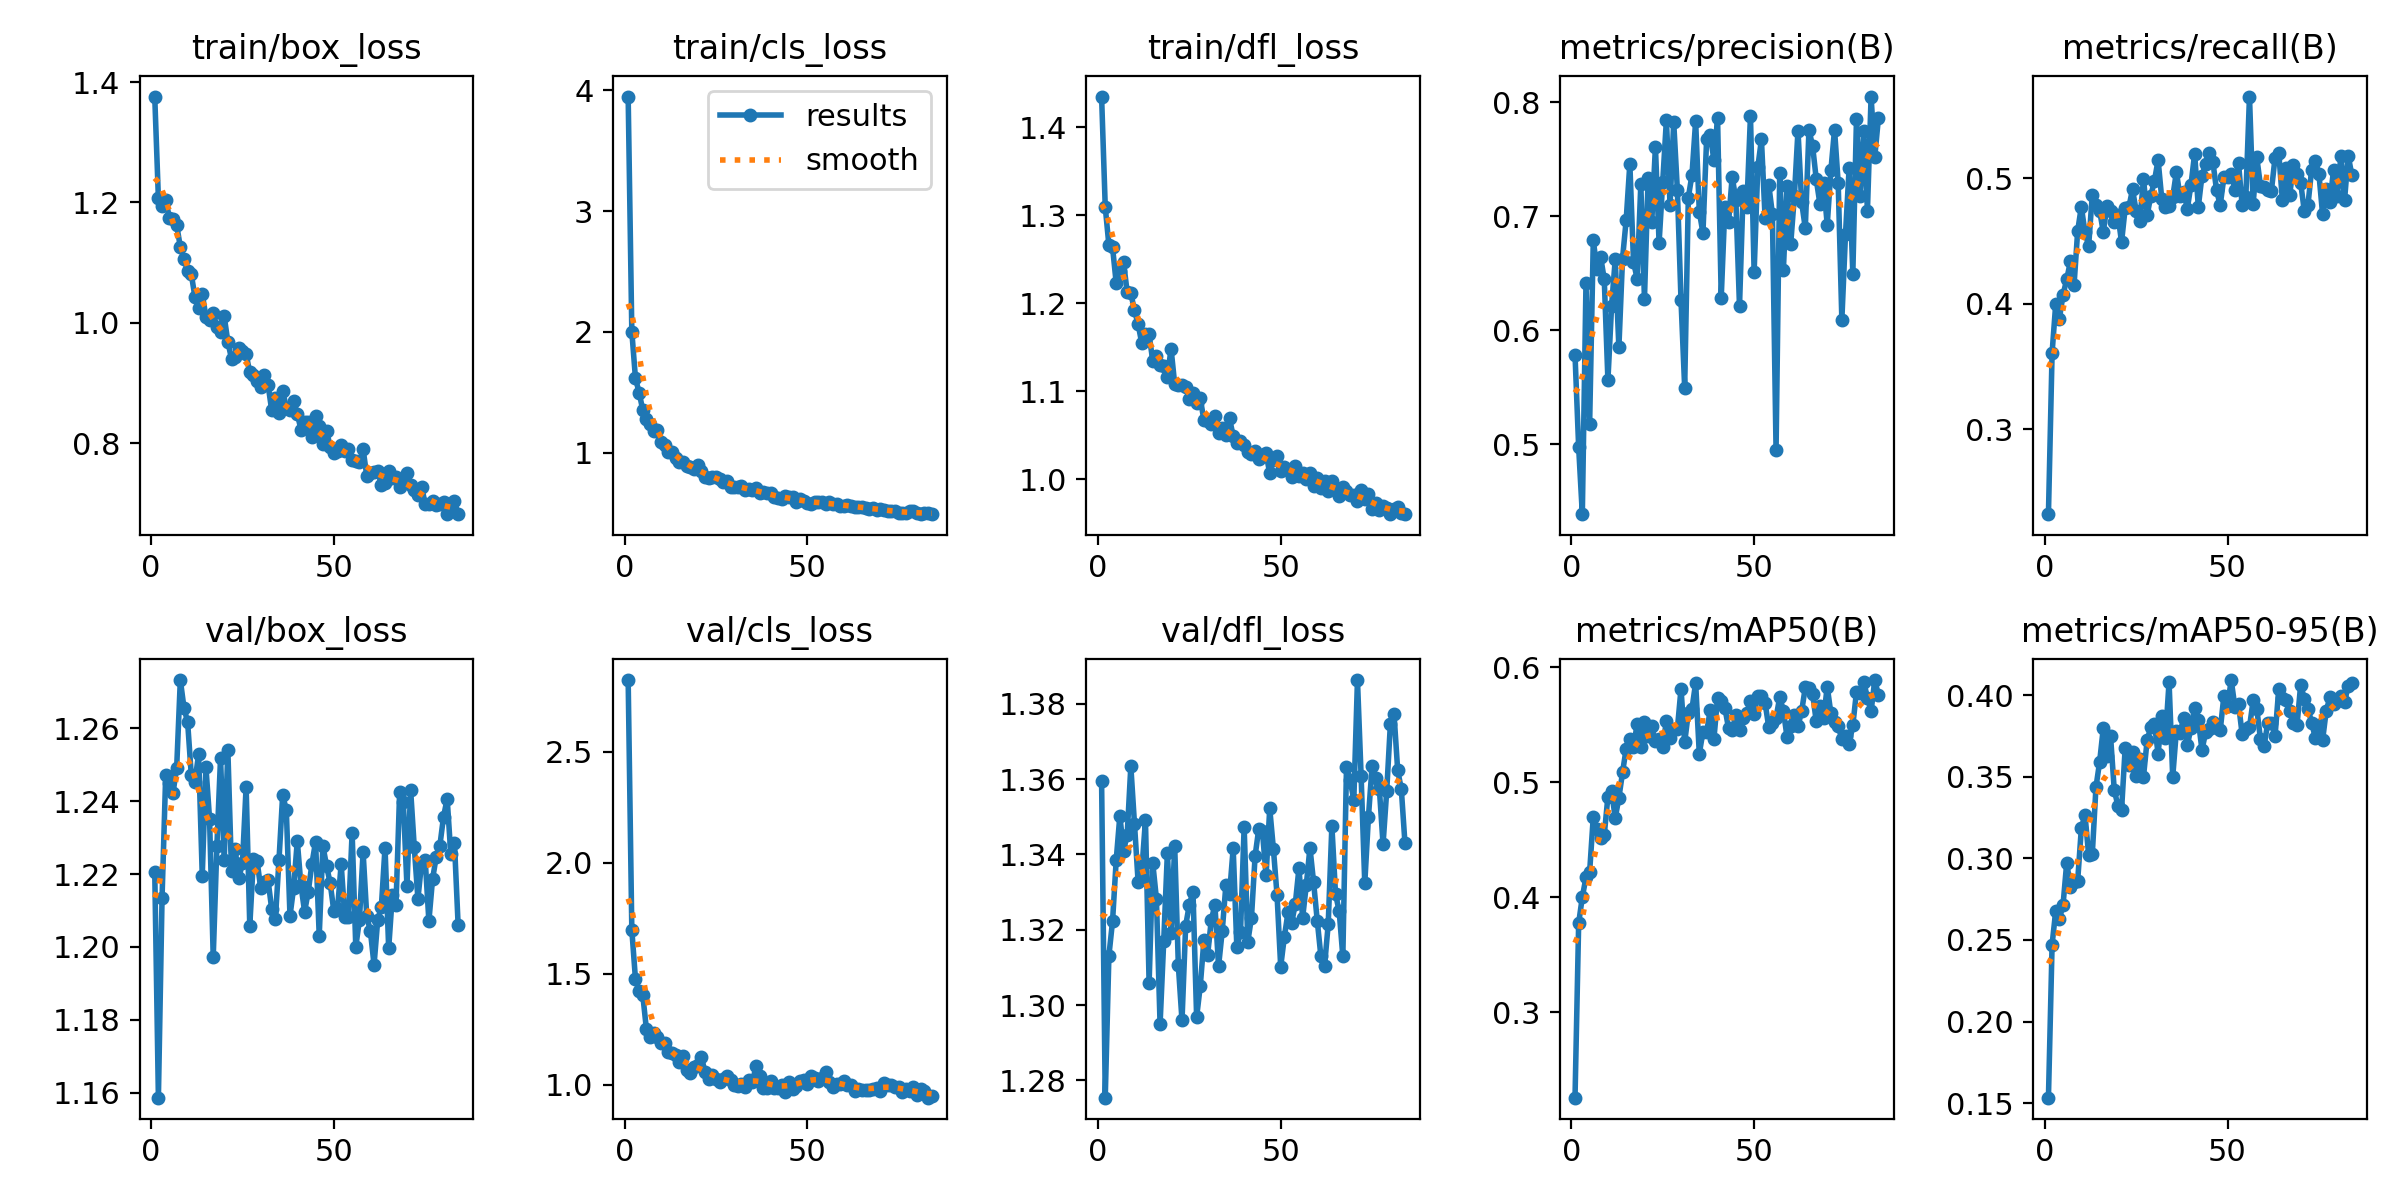

In [ ]:
Image(filename=f'/content/runs/detect/train2/results.png',width=600)

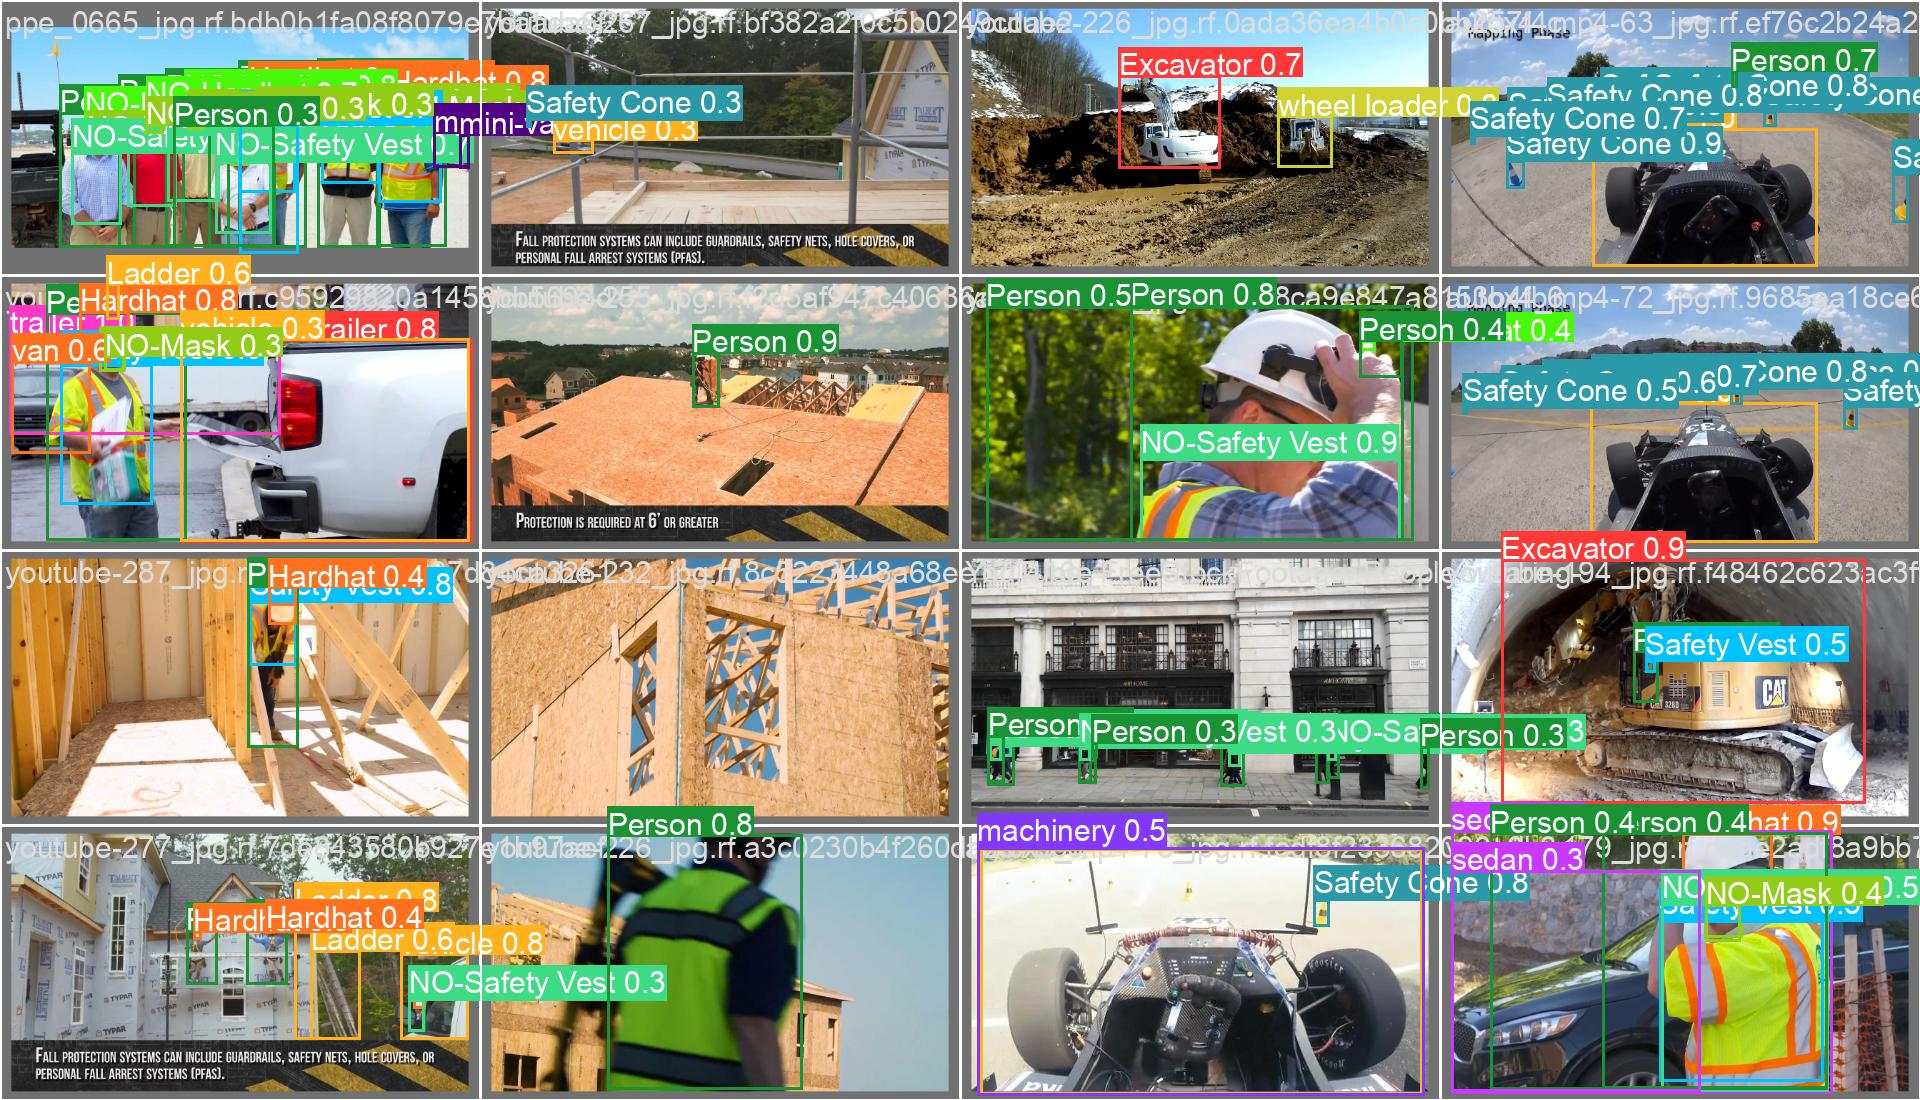

In [ ]:
Image(filename=f'/content/runs/detect/train2/val_batch0_pred.jpg',width=1000)

##Downloading Model

In [ ]:
!zip -r /content/file.zip /content/runs
from google.colab import files
files.download("/content/file.zip")

updating: content/runs/ (stored 0%)
updating: content/runs/detect/ (stored 0%)
updating: content/runs/detect/train/ (stored 0%)
updating: content/runs/detect/train/results.csv (deflated 86%)
updating: content/runs/detect/train/val_batch2_pred.jpg (deflated 8%)
updating: content/runs/detect/train/train_batch1.jpg (deflated 4%)
updating: content/runs/detect/train/weights/ (stored 0%)
updating: content/runs/detect/train/weights/best.pt (deflated 9%)
updating: content/runs/detect/train/weights/last.pt (deflated 9%)
updating: content/runs/detect/train/results.png (deflated 7%)
updating: content/runs/detect/train/labels.jpg (deflated 21%)
updating: content/runs/detect/train/args.yaml (deflated 51%)
updating: content/runs/detect/train/val_batch1_labels.jpg (deflated 9%)
updating: content/runs/detect/train/val_batch0_labels.jpg (deflated 5%)
updating: content/runs/detect/train/train_batch6270.jpg (deflated 9%)
updating: content/runs/detect/train/labels_correlogram.jpg (deflated 34%)
updating: 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Training Medium Model of YOLOV8 with default optimizers with 200 epoch

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/data.yaml epochs=200 imgsz=640

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/data.yaml, epochs=200, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=F

##Results of Medium Model

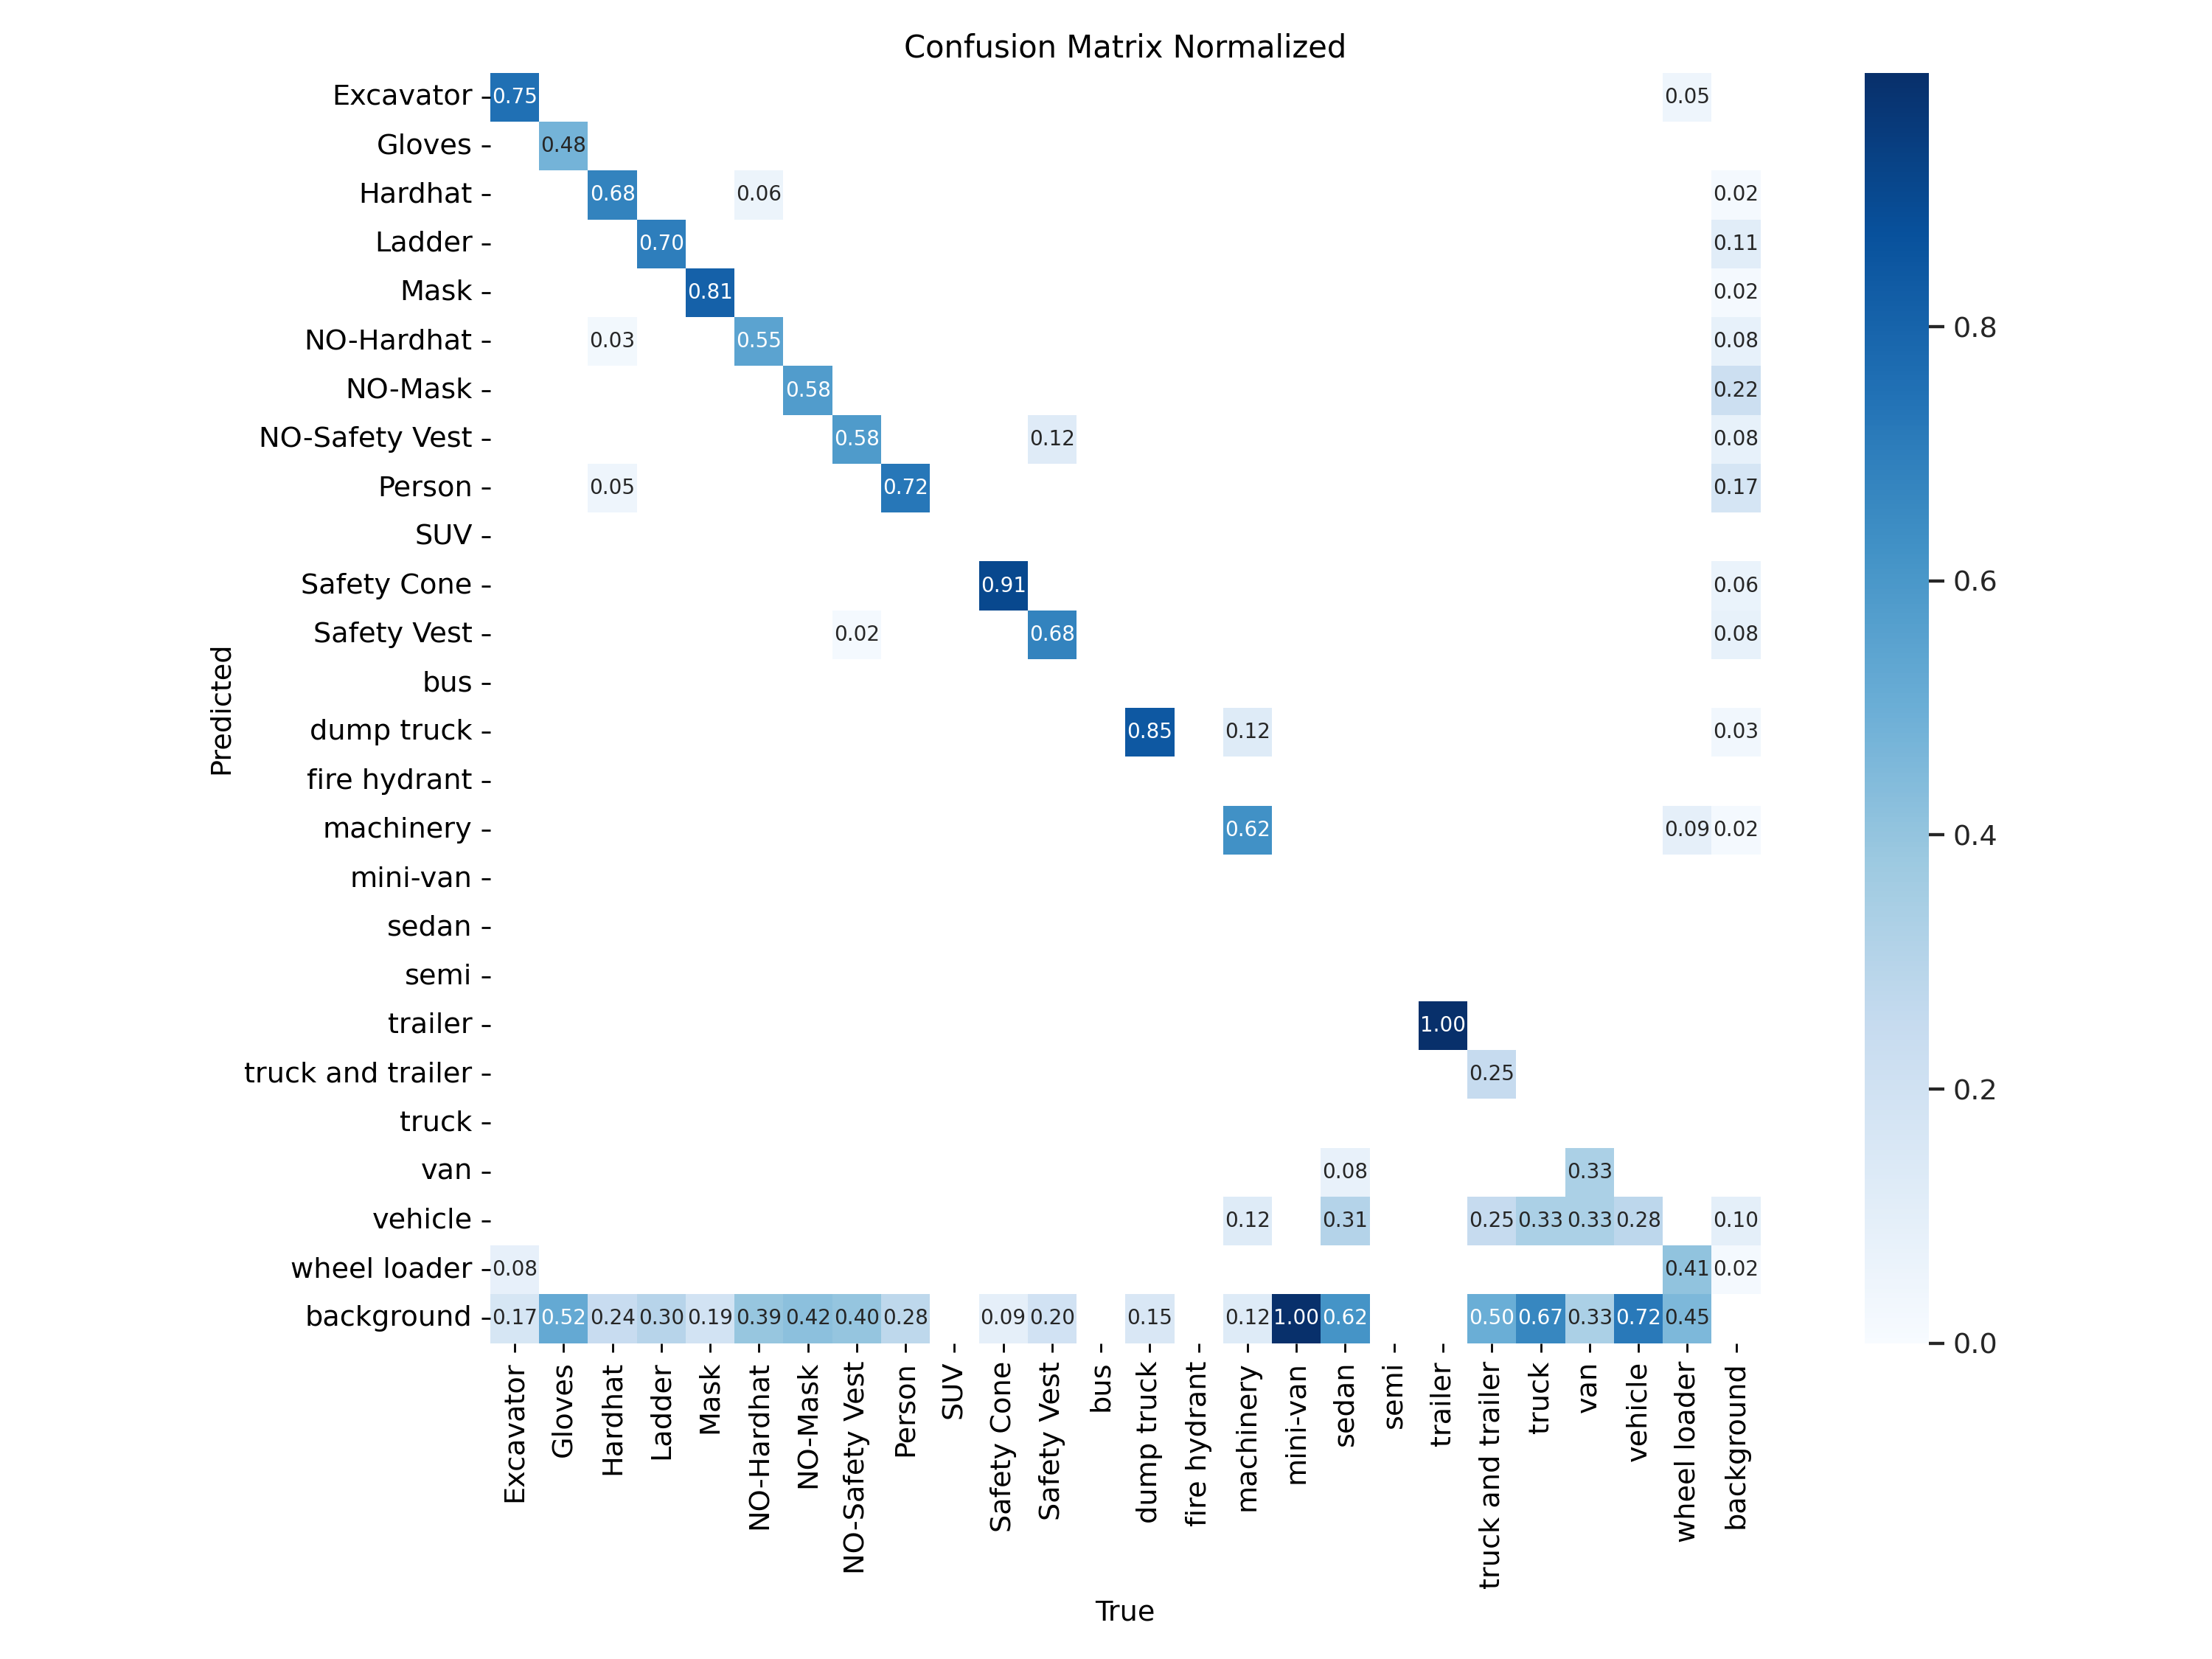

In [ ]:
Image(filename=f'/content/runs/detect/train4/confusion_matrix_normalized.png',width=600)

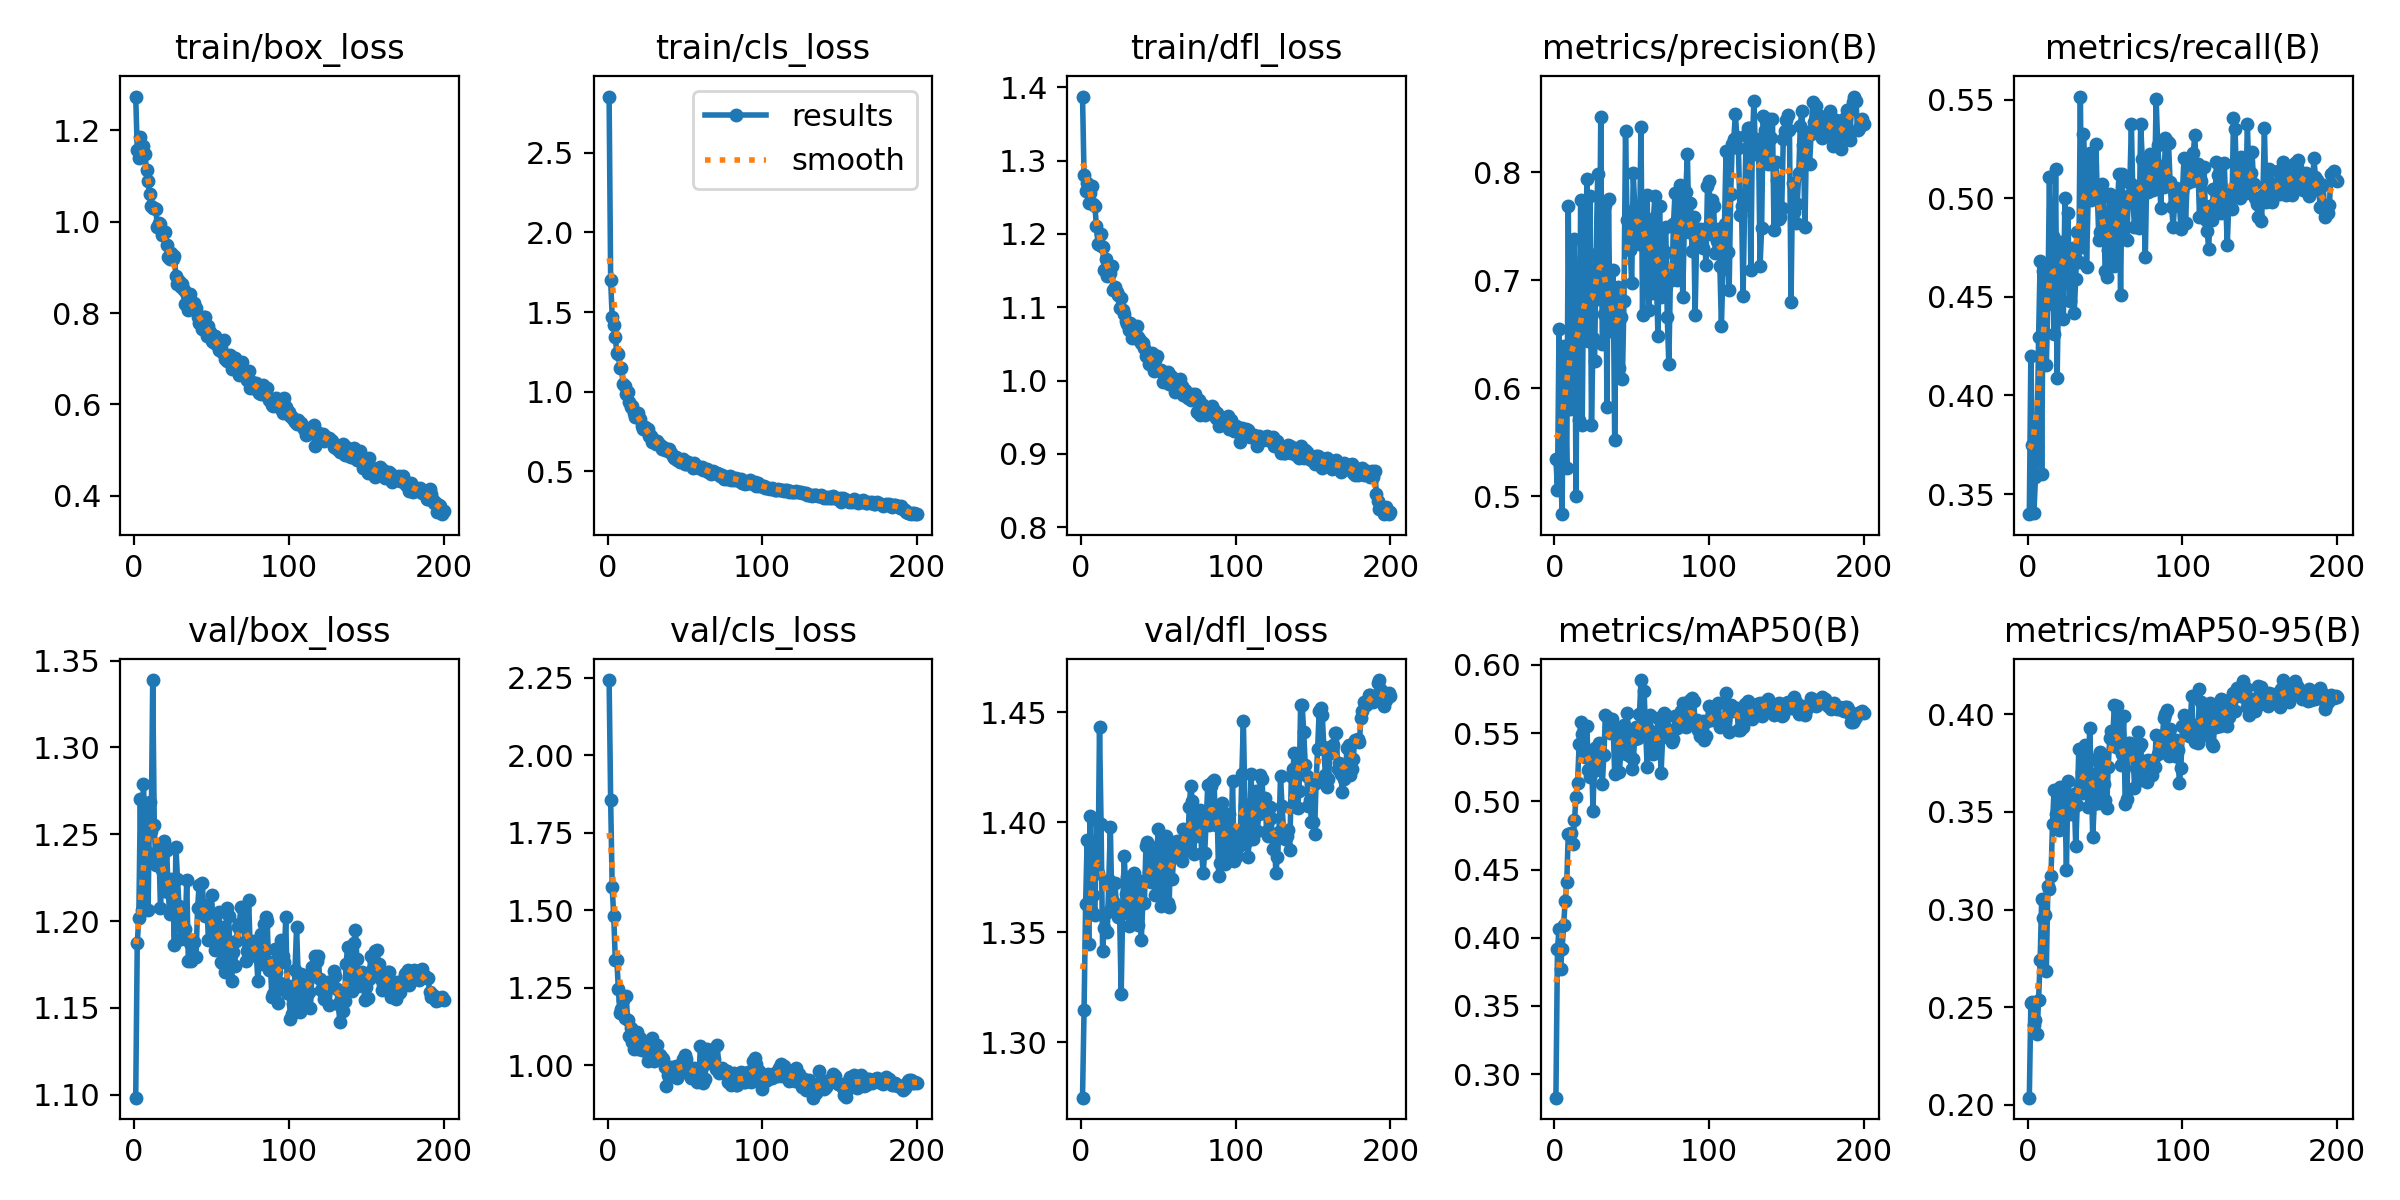

In [ ]:
Image(filename=f'/content/runs/detect/train4/results.png',width=600)

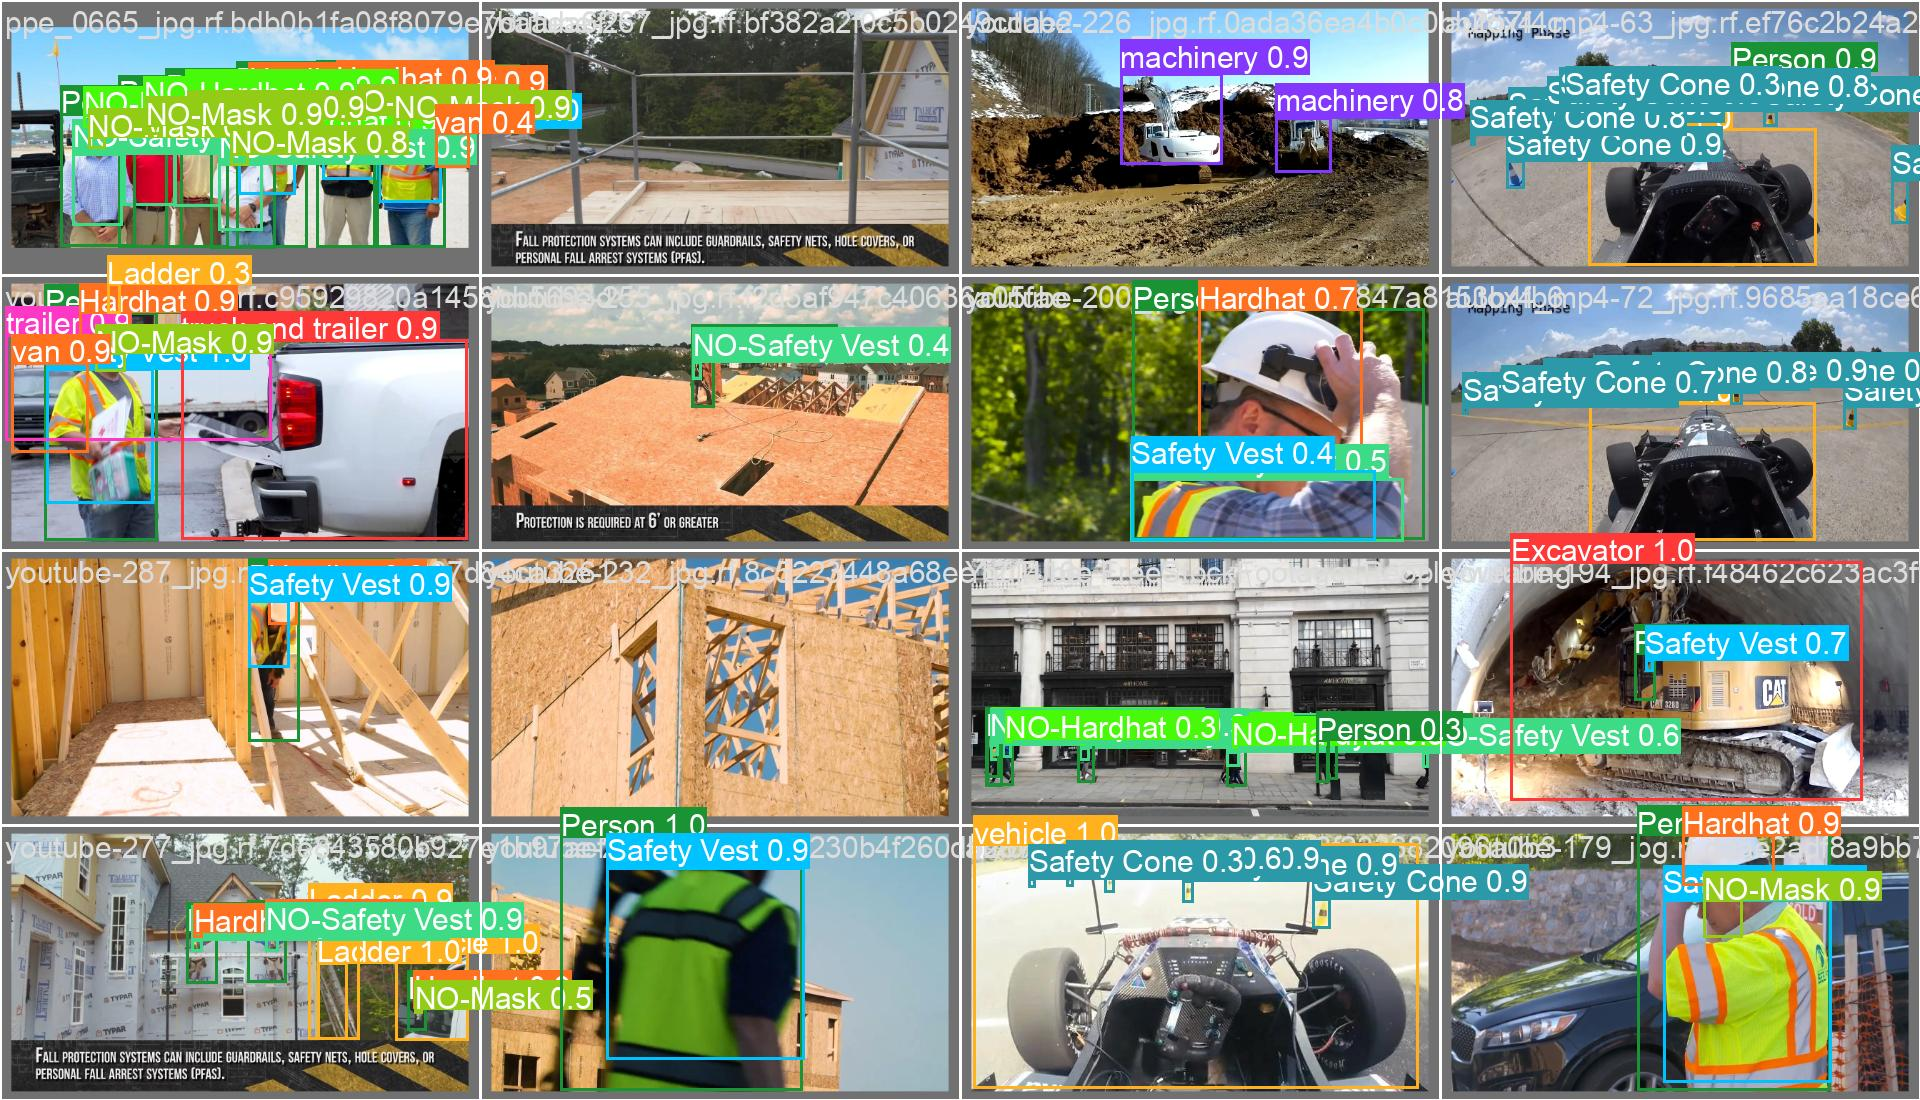

In [ ]:
Image(filename=f'/content/runs/detect/train4/val_batch0_pred.jpg',width=1000)

##Downloading Models

In [ ]:
!zip -r /content/file.zip /content/runs
from google.colab import files
files.download("/content/file.zip")

updating: content/runs/ (stored 0%)
updating: content/runs/detect/ (stored 0%)
updating: content/runs/detect/train/ (stored 0%)
updating: content/runs/detect/train/results.csv (deflated 86%)
updating: content/runs/detect/train/val_batch2_pred.jpg (deflated 8%)
updating: content/runs/detect/train/train_batch1.jpg (deflated 4%)
updating: content/runs/detect/train/weights/ (stored 0%)
updating: content/runs/detect/train/weights/best.pt (deflated 9%)
updating: content/runs/detect/train/weights/last.pt (deflated 9%)
updating: content/runs/detect/train/results.png (deflated 7%)
updating: content/runs/detect/train/labels.jpg (deflated 21%)
updating: content/runs/detect/train/args.yaml (deflated 51%)
updating: content/runs/detect/train/val_batch1_labels.jpg (deflated 9%)
updating: content/runs/detect/train/val_batch0_labels.jpg (deflated 5%)
updating: content/runs/detect/train/train_batch6270.jpg (deflated 9%)
updating: content/runs/detect/train/labels_correlogram.jpg (deflated 34%)
updating: 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Training MEDIUM with 300 EPOCH

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/data.yaml epochs=300 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 328MB/s]
Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/data.yaml, epochs=300, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, form

##Downloading Models

In [ ]:
!zip -r /content/file.zip /content/runs
from google.colab import files
files.download("/content/file.zip")

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/confusion_matrix.png (deflated 17%)
  adding: content/runs/detect/train/val_batch0_pred.jpg (deflated 5%)
  adding: content/runs/detect/train/train_batch0.jpg (deflated 3%)
  adding: content/runs/detect/train/val_batch0_labels.jpg (deflated 5%)
  adding: content/runs/detect/train/train_batch1.jpg (deflated 4%)
  adding: content/runs/detect/train/results.png (deflated 6%)
  adding: content/runs/detect/train/P_curve.png (deflated 11%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/last.pt (deflated 8%)
  adding: content/runs/detect/train/weights/best.pt (deflated 8%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 9%)
  adding: content/runs/detect/train/R_curve.png (deflated 12%)
  adding: content/runs/detect/train/val_batch1_pred.jpg (deflated 9%)
  add

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>